# What Makes A Movie Succeed? Based On A True Analysis

**Authors:** George Ogden, Christopher de la Cruz
***

## Overview

Our analysis currently reflects what types of films are doing best at the box office in 2021. We take a deep dive into exploring movie profits and popularity and their relationship with other film factors. Our project currently shows that action, adventure, and sci-fi movies are performing best and that the most profitable plots have familiar (and familial) themes and high stakes. This analysis can be used by any film studio currently debating what kinds of movies they should be making

## Business Problem

Microsoft is creating a movie studio and wants the rundown on what types of movies they should be creating. According to a 2016 poll among US adults, the most important factors in determining what to watch were dependant on genre, cast, relatable storylines, and films that were recommended (weight was given first to reccomendations by friends/family and then to other films that were related). We chose to mainly focus on what genres perform best, what synopsises performed best, how budget affects a film's popularity and what time of year of is best for release. The answers to these questions will result in films that are profitable, popular, and relatable. We are ignoring cast for the time being because we believe that that factor is too highly specific to the movie's type and that the answer will change for each genre.

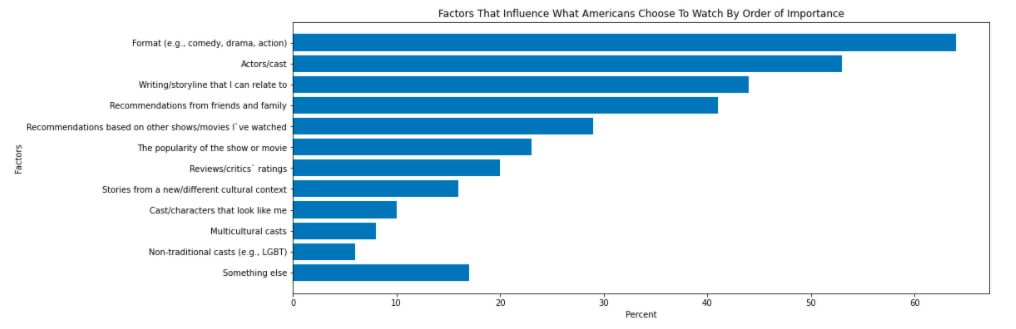

## Data Understanding

We chose to build our own dataset through IMDb via IMDbPY, a python module which allows you to directly retrieve data from the IMDb website.  Ultimately, our base datasets included 2,475 films from IMDb of the top grossing movies for each year between 2014 and 2019.  This dataset included revenue--domestic and international--and 8 factors that we were interested in analyzing, including:

- Budget<br>
- Rating<br>
- Vote Count<br>
- Genre<br>
- Plot Synopsis<br>
- Year<br>
- Month<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from scipy import stats
from collections import Counter
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [3]:
df_imdb = pd.read_pickle('data/Final_UnFromatted_wGross.pkl')
df_imdb.head()

,year,genres,original air date,plot outline,runtimes,title,cast,country codes,director,language codes,production companies,rating,votes,certificates,box office,domestic_gross,intl_gross,total_gross,budget
imdbID,,,,,,,,,,,,,,,,,,,
tt4154796,2019,"[Action, Adventure, Drama, Sci-Fi]",26 Apr 2019 (USA),After the devastating events of Avengers: Infi...,[181],Avengers: Endgame,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",[us],Anthony Russo,"[en, ja, xh, de]","[Marvel Studios, Walt Disney Pictures]",8.4,846287.0,"[Argentina:13, Australia:M, Austria:12, Belgiu...","{'Budget': '$356,000,000 (estimated)', 'Openin...",858373000,1939128328,2797501328,356000000.0
tt2488496,2015,"[Action, Adventure, Sci-Fi]",18 Dec 2015 (USA),30 years after the defeat of Darth Vader and t...,[138],Star Wars: Episode VII - The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[us],J.J. Abrams,[en],"[Lucasfilm, Bad Robot, Truenorth Productions, ...",7.9,866587.0,"[Argentina:13, Australia:M, Austria:12, Brazil...","{'Budget': '$245,000,000 (estimated)', 'Openin...",936662225,1131561399,2068223624,245000000.0
tt4154756,2018,"[Action, Adventure, Sci-Fi]",27 Apr 2018 (USA),As the Avengers and their allies have continue...,[149],Avengers: Infinity War,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[us],Anthony Russo,[en],"[Marvel Studios, Jason Roberts Productions, So...",8.4,858407.0,"[Argentina:13::(with warning), Australia:M, Au...","{'Budget': '$321,000,000 (estimated)', 'Openin...",678815482,1369544272,2048359754,NaN
tt0369610,2015,"[Action, Adventure, Sci-Fi]",12 Jun 2015 (USA),Twenty-two years after the original Jurassic P...,[124],Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[us],Colin Trevorrow,[en],"[Universal Pictures, Amblin Entertainment, Leg...",7.0,583598.0,"[Argentina:13::(with warning), Australia:M, Au...","{'Budget': '$150,000,000 (estimated)', 'Openin...",652270625,1018130012,1670400637,150000000.0
tt6105098,2019,"[Animation, Adventure, Drama, Family, Musical]",19 Jul 2019 (USA),"In Africa, the lion cub Simba is the pride and...",[118],The Lion King,"[Chiwetel Ejiofor, John Oliver, James Earl Jon...","[us, gb, za]",Jon Favreau,"[en, xh, zu, fr, es, hi]","[Walt Disney Pictures, Fairview Entertainment,...",6.9,215915.0,"[Argentina:Atp, Australia:PG, Austria:6, Belgi...","{'Budget': '$260,000,000 (estimated)', 'Openin...",543638043,1113305351,1656943394,260000000.0


## Data Preparation

We dropped the columns: runtimes, cast, country codes, director, language codes, production companies, certificates, and box office (we dropped box office because we already had columns for budget and gross profit). 

We added a 'month' column (by separating the month from each year in the original airdate column) and a column for the length of the synopsis.

We left the outliers and missing values as they were in the original database but when creating visualizations, we would create different datasets with the columns we wanted to analyze and in these new datasets we would drop the missing values. As for the outliers, we looked at a histogram when appropriate to account for outlier values. 

We also dropped any rows in our visualizations where the budget or revenue was 0 as this doesn't verify whether 0 was considered a missing value or if the film may have been in a very exceptional scenario. We believe these choices were appropriate because the dataset is large enough to have films dropped and still be a very reliable dataset.


In [4]:
from Dataframe_Cleaning import imdb_clean
imdb_clean()

,year,genres,original air date,plot outline,title,rating,votes,domestic_gross,intl_gross,total_gross,budget,synopsis_len,month
imdbID,,,,,,,,,,,,,
tt4154796,2019,"[Action, Adventure, Drama, Sci-Fi]",26 Apr 2019 (USA),After the devastating events of Avengers: Infi...,Avengers: Endgame,8.4,846287.0,858373000,1939128328,2797501328,356000000.0,350.0,Apr
tt2488496,2015,"[Action, Adventure, Sci-Fi]",18 Dec 2015 (USA),30 years after the defeat of Darth Vader and t...,Star Wars: Episode VII - The Force Awakens,7.9,866587.0,936662225,1131561399,2068223624,245000000.0,338.0,Dec
tt4154756,2018,"[Action, Adventure, Sci-Fi]",27 Apr 2018 (USA),As the Avengers and their allies have continue...,Avengers: Infinity War,8.4,858407.0,678815482,1369544272,2048359754,NaN,482.0,Apr
tt0369610,2015,"[Action, Adventure, Sci-Fi]",12 Jun 2015 (USA),Twenty-two years after the original Jurassic P...,Jurassic World,7.0,583598.0,652270625,1018130012,1670400637,150000000.0,326.0,Jun
tt6105098,2019,"[Animation, Adventure, Drama, Family, Musical]",19 Jul 2019 (USA),"In Africa, the lion cub Simba is the pride and...",The Lion King,6.9,215915.0,543638043,1113305351,1656943394,260000000.0,765.0,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0037059,1944,"[Comedy, Drama, Family, Music, Romance]",Jan 1945 (USA),St. Louis 1903. The well-off Smith family has ...,Meet Me in St. Louis,7.5,21308.0,403521,0,403521,1700000.0,417.0,19
tt0048473,1955,[Drama],26 Aug 1955 (India),"The story of a young boy, Apu, and life in his...",Pather Panchali,8.6,23967.0,402723,0,402723,NaN,650.0,Aug
tt3735554,2015,"[Action, Drama, Thriller, War]",NaN,"Caught in the middle of a brutal civil war, si...",Freetown,4.7,1198.0,401328,0,401328,NaN,370.0,None


## Data Modeling


### Budget's Relationship with Rating and Popularity

The relationship between a film's budget and it's rating is virtually non-existent meaning the amount of money you throw at a movie does not have an effect on whether it will be a highly rated film. There is a slightly stronger positive relationship between budget and vote count meaning that a high budget does play a significant role in how popular the movie will be but it is not the deciding factor alone

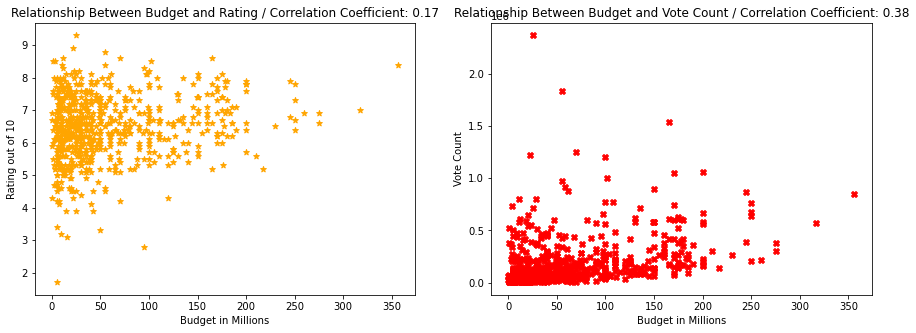

In [5]:
%run visualizations.py
pop_rate_budget();

### The Relationship Between Budget and Movie Revenue

There is a strong relationship between a film's budget and its revenue (correlation coefficient of 0.75) meaning that putting more money into a movie does generally mean a higher return on investment

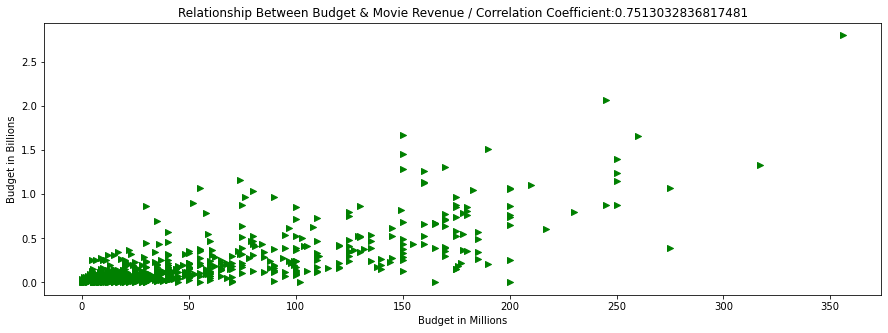

In [6]:
budget_gross()

### The Avg Budget of Popular & Highly Rated Movies

We can see a powerful right skew on the distribution of movie budgets that are highly rated and popular. We can also see very strong outliers which is relativey unsurprising considering big movie blockbusters

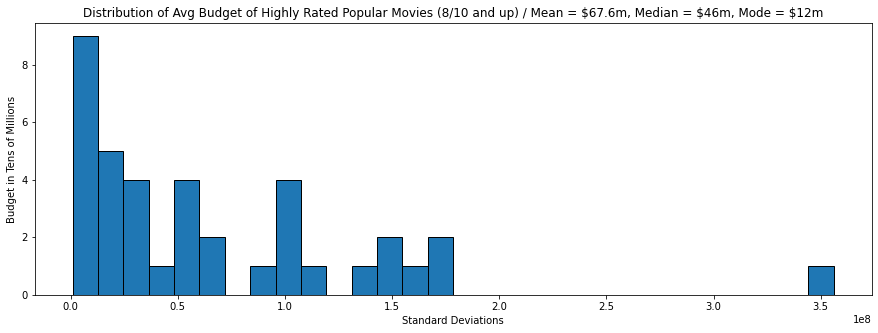

In [7]:
sweet_budget()

### Cumulative Revenue Per Individual Genre in the Billions

We can see below that individually adventure, action, and sci-fi have brought in a lot more profit over the past 5 years then other genres

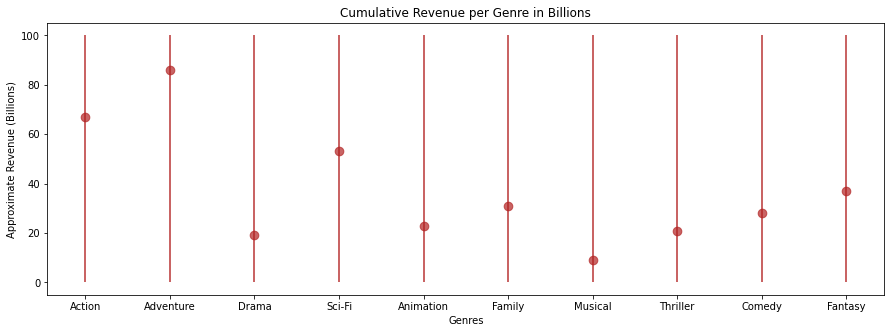

In [8]:
genre_indiv()

### Most Common Genre Combination Among the 100 Most Profitable Films

We can see that across the 100 most profitable films in the past 5 years, the combination of Action, Adventure, and Sci-Fi has been most common venture and is likely the safest bet

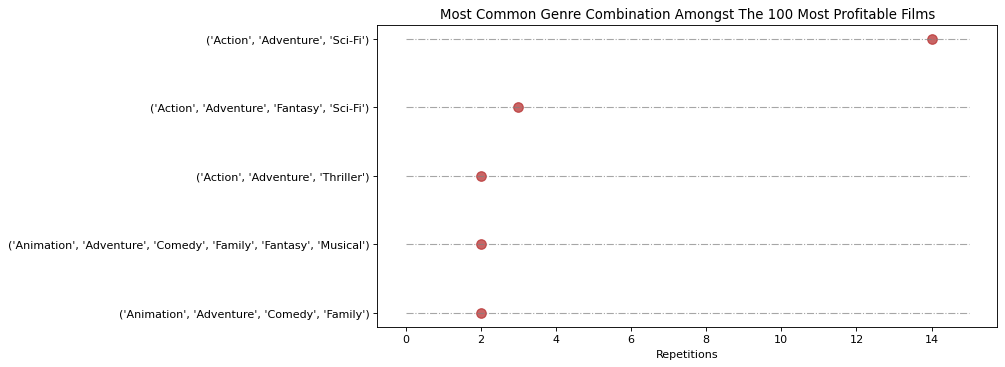

In [9]:
genre_pairs()

### Number of Movie Releases By Month

We can see here the popular movies are released more during mid-summer and the end of the year. Jan - Feb and Aug - Sep are what the movie industry refers to as slump months

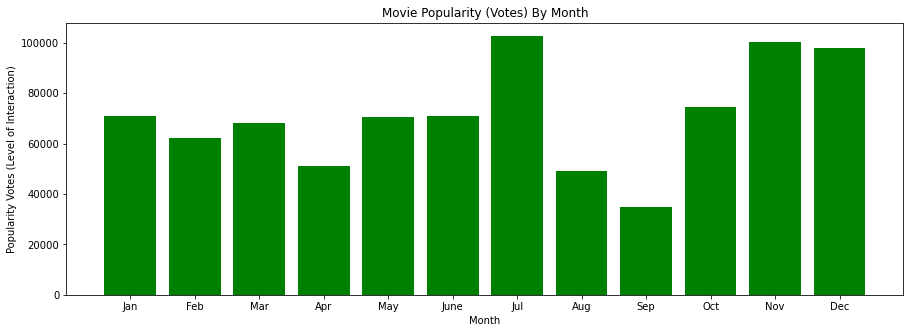

In [10]:
movie_month()

### Word Map For The Synopsises All Films In The Past 5 Years

A look at a word map of all the synopsises of all films in the past 5 years reveals strong familial themes and relationships

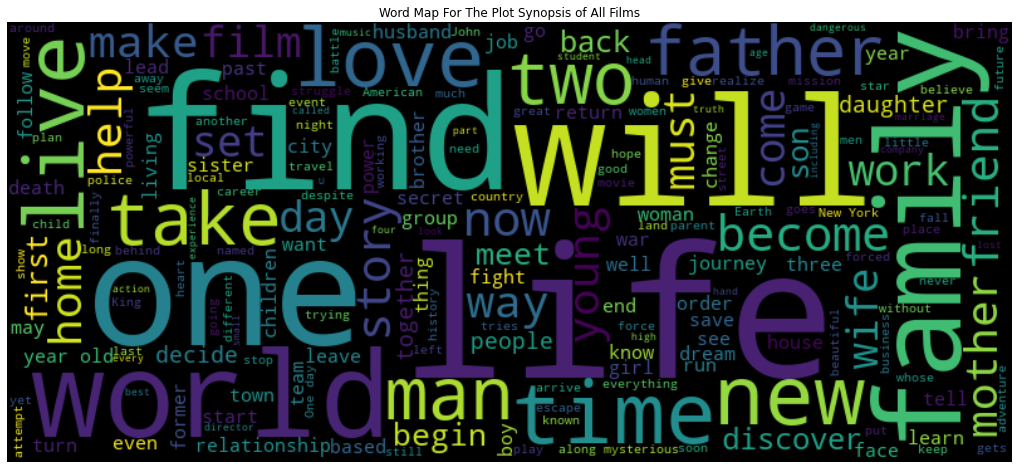

In [11]:
word_map_all()

### Word Map For All The Synopsis For The Top 100 Highest Grossing Films in the Past 5 Years

This word map reveals that the highest grossing films are very franchise-based with recognizable characters and names as well as very high stakes such as the fate of Earth or the world

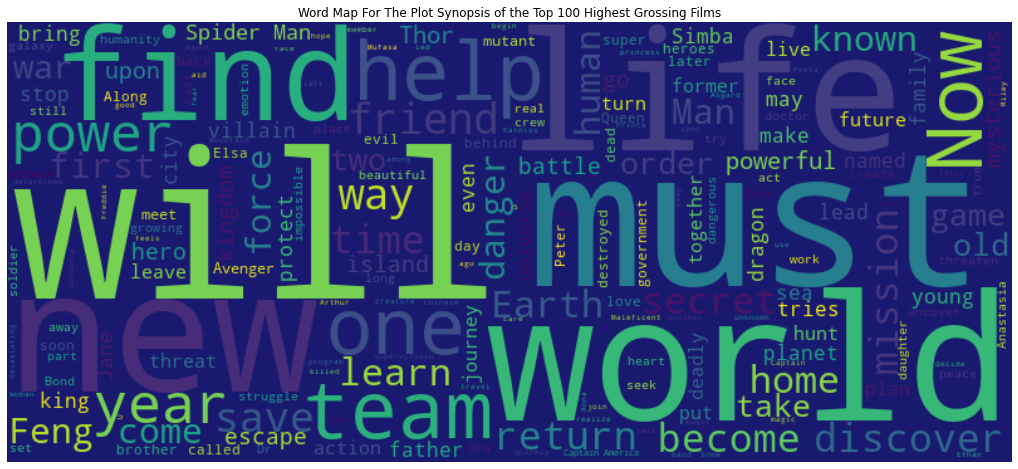

In [12]:
word_map_gross();

In [15]:
#run_all_viz(); #this function isn't necessary to run. It simply returns EVERY visualization above at the same time

## Conclusions
These are our business recommendations for a future film:<br>

1. We stick to a budget of 12m - 67.6m. The grand majority of films that are popular and perform well are in this range. Higher budgets are justifiable on a case by case scenario (mainly a film designed to be a blockbuster hit)<br>

2. Action, Adventure and Sci - Fi are all outperforming all the other genres both individually and combined and we highly recommend doing our first film in one or a combination of these genres.<br>

3. We aim for release during what the film industry calls the "slump months" (Jan - Feb & Aug - Sept). These two periods are when quality of movie releases are at their lowest (due to the month before these periods being considered prime time for mega blockbusters). We recommend aiming for a release during one of the slump months as a) we are not equipped to compete with an established blockbuster and 2) there will be less competition, giving our film a higher chance of standing out

4. Keep all story lines high stakes, with strong familial-like relationships and familiar themes

## Next Steps

These are the next steps we believe we should take:

1. Franchises are enormously profitable but almost all already owned by other movie studios. We advise doing a deep dive into any existing unowned franchises and potential for creating our own franchise

2. Each genre and genre combination will require its own personal deep dive into further details such as the current hottest actors and directors in each genre, the runtimes that perform best, audience rating that performs best, etc

3. Our research also showed that the profit for online TV streaming and internet content rivals film profits and we advise doing a special deep dive into also creating online streaming television shows and online content
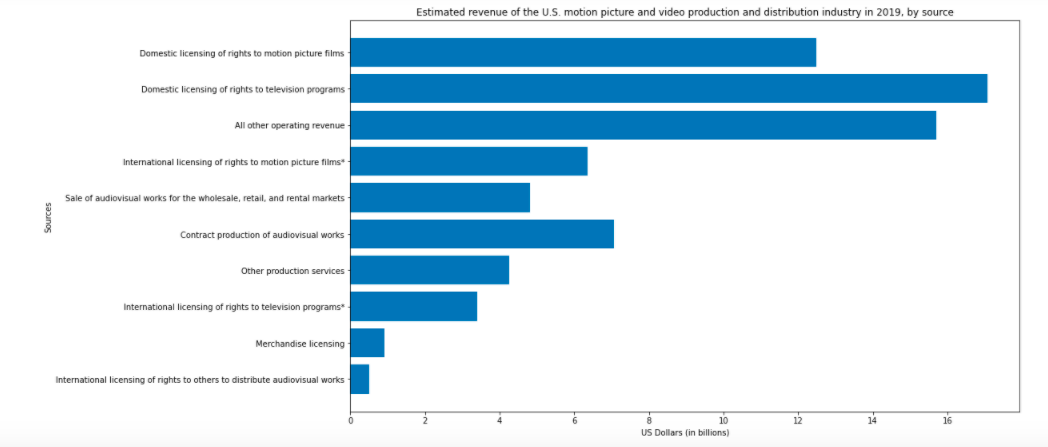